## Selenium 사용하기
- 네이버 메일

## 네이버 로그인

In [3]:
from selenium import webdriver

In [26]:
driver = webdriver.Chrome('../driver/chromedriver.exe')
driver.get("http://naver.com")

In [27]:
xpath = """//*[@id="account"]/a"""
driver.find_element_by_xpath(xpath).click()

In [28]:
elem_login = driver.find_element_by_id("id")
elem_login.clear()
elem_login.send_keys("***")

elem_login = driver.find_element_by_id("pw")
elem_login.clear()
elem_login.send_keys("*****")

In [29]:
xpath="""//*[@id="log.login"]"""
driver.find_element_by_xpath(xpath).click()

## 네이버 메일가기

In [32]:
driver.get("http://mail.naver.com")

In [34]:
from bs4 import BeautifulSoup

In [35]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [36]:
raw_list = soup.find_all('div', 'name _ccr(lst.from) ')
raw_list

[<div class="name _ccr(lst.from) "><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|11047) _stopDefault" href="#" title='"네이버 MYBOX" &lt;mybox_noreply@navercorp.com&gt;'>네이버 MYBOX</a></div>,
 <div class="name _ccr(lst.from) "><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|11046) _stopDefault" href="#" title='"네이버 MYBOX" &lt;mybox_noreply@navercorp.com&gt;'>네이버 MYBOX</a></div>,
 <div class="name _ccr(lst.from) "><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|11045) _stopDefault" href="#" title='"네이버 MYBOX" &lt;mybox_noreply@navercorp.com&gt;'>네이버 MYBOX</a></div>,
 <div class="name _ccr(lst.from) "><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|11044) _stopDefault" href="#" title='"GitHub" &lt;noreply@github.com&gt;'>GitHub</a></div>,
 <div class="name _ccr(lst.from) "><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|

## 4-2. 서울시 구별 주유소 가격 정보 얻기

In [76]:
driver = webdriver.Chrome('../driver/chromedriver.exe')
driver.get("https://www.opinet.co.kr/user/main/mainView.do")

In [77]:
# 클릭할 부분
xpath = """//*[@id="header"]/div/ul/li[1]/ul/li[1]/a"""
# 커서 올려놓을 부분
element = driver.find_element_by_class_name("gnbTopa")

# 마우스 특정 위치에 올려놓기 
putmouse = webdriver.ActionChains(driver).move_to_element(element)
# 실행
putmouse.perform()

driver.find_element_by_xpath(xpath).click()

In [78]:
# 서울시로 변경
xpath = """//*[@id="SIDO_NM0"]/option[2]"""
driver.find_element_by_xpath(xpath).click()

In [79]:
# 시군구 리스트에서 option 태그들 가지고오기 
gu_list_raw = driver.find_element_by_xpath("""//*[@id="SIGUNGU_NM0"]""")
gu_list = gu_list_raw.find_elements_by_tag_name("option")

In [80]:
gu_names = [option.get_attribute("value") for option in gu_list]
gu_names.remove('')
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [73]:
element = driver.find_element_by_id("SIGUNGU_NM0")
element.send_keys(gu_names[0])

In [74]:
xpath = """//*[@id="searRgSelect"]"""
driver.find_element_by_xpath(xpath).click()

In [83]:
# 엑셀 파일로 저장하기!
import time
from tqdm import tqdm_notebook

In [84]:
for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)
    
    time.sleep(2)
    
    xpath = """//*[@id="searRgSelect"]"""
    element_sel_gu = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)
    
    xpath = """//*[@id="glopopd_excel"]"""
    element_get_excel = driver.find_element_by_xpath(xpath).click()
    
    time.sleep(1)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


  0%|          | 0/25 [00:00<?, ?it/s]

In [85]:
driver.close()

## 4-3 구별 주유 가격에 대한 데이터의 정리

In [1]:
import pandas as pd
# 파일 리스트를 뽑을 때 사용하는 모듈. 일단 보시죠.
from glob import glob

In [2]:
glob('data/지역_위치별(주유소)*.xls')

['data\\지역_위치별(주유소) (1).xls',
 'data\\지역_위치별(주유소) (10).xls',
 'data\\지역_위치별(주유소) (11).xls',
 'data\\지역_위치별(주유소) (12).xls',
 'data\\지역_위치별(주유소) (13).xls',
 'data\\지역_위치별(주유소) (14).xls',
 'data\\지역_위치별(주유소) (15).xls',
 'data\\지역_위치별(주유소) (16).xls',
 'data\\지역_위치별(주유소) (17).xls',
 'data\\지역_위치별(주유소) (18).xls',
 'data\\지역_위치별(주유소) (19).xls',
 'data\\지역_위치별(주유소) (2).xls',
 'data\\지역_위치별(주유소) (20).xls',
 'data\\지역_위치별(주유소) (21).xls',
 'data\\지역_위치별(주유소) (22).xls',
 'data\\지역_위치별(주유소) (23).xls',
 'data\\지역_위치별(주유소) (24).xls',
 'data\\지역_위치별(주유소) (3).xls',
 'data\\지역_위치별(주유소) (4).xls',
 'data\\지역_위치별(주유소) (5).xls',
 'data\\지역_위치별(주유소) (6).xls',
 'data\\지역_위치별(주유소) (7).xls',
 'data\\지역_위치별(주유소) (8).xls',
 'data\\지역_위치별(주유소) (9).xls',
 'data\\지역_위치별(주유소).xls']

In [3]:
stations_files = glob('data/지역_위치별(주유소)*.xls')

In [4]:
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)
    
station_raw = pd.concat(tmp_raw)

In [5]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 0 to 33
Data columns (total 10 columns):
지역       456 non-null object
상호       456 non-null object
주소       456 non-null object
상표       456 non-null object
전화번호     456 non-null object
셀프여부     456 non-null object
고급휘발유    456 non-null object
휘발유      456 non-null object
경유       456 non-null object
실내등유     456 non-null object
dtypes: object(10)
memory usage: 39.2+ KB


In [6]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,2125,2145,-
1,서울특별시,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),현대오일뱅크,02-3428-1739,Y,2279,2133,2163,-
2,서울특별시,(주)소모에너지 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-475-2600,N,2305,2145,2165,1700
3,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,2153,2167,-
4,서울특별시,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),GS칼텍스,02-426-5372,Y,-,2163,2161,-


In [7]:
stations = pd.DataFrame({'Oil_store':station_raw['상호'], 
                                       '주소':station_raw['주소'],
                                       '가격':station_raw['휘발유'],
                                       '셀프':station_raw['셀프여부'],
                                       '상표':station_raw['상표']  })
stations.head()

,Oil_store,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),2125,Y,현대오일뱅크
1,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),2133,Y,현대오일뱅크
2,(주)소모에너지 신월주유소,서울 강동구 양재대로 1323 (성내동),2145,N,GS칼텍스
3,구천면주유소,서울 강동구 구천면로 357 (암사동),2153,N,현대오일뱅크
4,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),2163,Y,GS칼텍스


In [8]:
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),2125,Y,현대오일뱅크,강동구
1,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),2133,Y,현대오일뱅크,강동구
2,(주)소모에너지 신월주유소,서울 강동구 양재대로 1323 (성내동),2145,N,GS칼텍스,강동구
3,구천면주유소,서울 강동구 구천면로 357 (암사동),2153,N,현대오일뱅크,강동구
4,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),2163,Y,GS칼텍스,강동구


In [9]:
stations['구'].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [10]:
stations[stations['가격']=='-']

,Oil_store,주소,가격,셀프,상표,구
29,지에스칼텍스(주)내곡주유소,서울 서초구 헌릉로 210,-,N,GS칼텍스,서초구
27,한일주유소,서울 영등포구 도림로 486 (문래동3가),-,N,SK에너지,영등포구
11,북서울고속주유소,서울 강북구 삼양로 410 (수유동),-,Y,S-OIL,강북구
16,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
8,현대오일뱅크㈜직영 재동주유소,서울 종로구 율곡로 58 (경운동),-,N,현대오일뱅크,종로구
10,지에스칼텍스(주)직영 역전점,서울 중구 퇴계로 15,-,N,GS칼텍스,중구
14,대성산업(주)구의주유소,서울 광진구 광나루로 570 (구의동),-,N,GS칼텍스,광진구
15,지에스칼텍스 (주)구의스타주유소,서울 광진구 자양로 103,-,N,GS칼텍스,광진구
20,서서울고속주유소,서울 구로구 경인로 150 (오류동),-,N,GS칼텍스,구로구


In [11]:
stations = stations[stations['가격'] != '-']
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),2125,Y,현대오일뱅크,강동구
1,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),2133,Y,현대오일뱅크,강동구
2,(주)소모에너지 신월주유소,서울 강동구 양재대로 1323 (성내동),2145,N,GS칼텍스,강동구
3,구천면주유소,서울 강동구 구천면로 357 (암사동),2153,N,현대오일뱅크,강동구
4,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),2163,Y,GS칼텍스,강동구


In [12]:
stations['가격'] = [float(value) for value in stations['가격']]

In [13]:
stations.reset_index(inplace=True)
stations

,index,Oil_store,주소,가격,셀프,상표,구
0,0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),2125.0,Y,현대오일뱅크,강동구
1,1,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),2133.0,Y,현대오일뱅크,강동구
2,2,(주)소모에너지 신월주유소,서울 강동구 양재대로 1323 (성내동),2145.0,N,GS칼텍스,강동구
3,3,구천면주유소,서울 강동구 구천면로 357 (암사동),2153.0,N,현대오일뱅크,강동구
4,4,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),2163.0,Y,GS칼텍스,강동구
5,5,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),2184.0,N,SK에너지,강동구
6,6,대성석유(주)길동주유소,서울 강동구 천호대로 1168,2185.0,N,GS칼텍스,강동구
7,7,방아다리주유소,서울 강동구 동남로 811 (명일동),2185.0,Y,SK에너지,강동구
8,8,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),2185.0,N,GS칼텍스,강동구
9,9,sk해뜨는주유소,서울 강동구 상일로 132 (강일동),2187.0,Y,SK에너지,강동구


In [14]:
del stations['index']

In [15]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 6 columns):
Oil_store    447 non-null object
주소           447 non-null object
가격           447 non-null float64
셀프           447 non-null object
상표           447 non-null object
구            447 non-null object
dtypes: float64(1), object(5)
memory usage: 21.0+ KB


In [16]:
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),2125.0,Y,현대오일뱅크,강동구
1,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),2133.0,Y,현대오일뱅크,강동구
2,(주)소모에너지 신월주유소,서울 강동구 양재대로 1323 (성내동),2145.0,N,GS칼텍스,강동구
3,구천면주유소,서울 강동구 구천면로 357 (암사동),2153.0,N,현대오일뱅크,강동구
4,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),2163.0,Y,GS칼텍스,강동구


In [17]:
stations.columns

Index(['Oil_store', '주소', '가격', '셀프', '상표', '구'], dtype='object')

In [18]:
stations = stations[['Oil_store', '가격', '상표', '셀프', '주소', '구']]
stations

,Oil_store,가격,상표,셀프,주소,구
0,재건에너지 재정제2주유소 고속셀프지점,2125.0,현대오일뱅크,Y,서울특별시 강동구 천호대로 1246 (둔촌제2동),강동구
1,현대오일뱅크㈜직영 명일셀프주유소,2133.0,현대오일뱅크,Y,서울 강동구 고덕로 168 (명일동),강동구
2,(주)소모에너지 신월주유소,2145.0,GS칼텍스,N,서울 강동구 양재대로 1323 (성내동),강동구
3,구천면주유소,2153.0,현대오일뱅크,N,서울 강동구 구천면로 357 (암사동),강동구
4,지에스칼텍스㈜ 동서울주유소,2163.0,GS칼텍스,Y,서울 강동구 천호대로 1456 (상일동),강동구
5,주)지유에너지직영 오렌지주유소,2184.0,SK에너지,N,서울 강동구 성안로 102 (성내동),강동구
6,대성석유(주)길동주유소,2185.0,GS칼텍스,N,서울 강동구 천호대로 1168,강동구
7,방아다리주유소,2185.0,SK에너지,Y,서울 강동구 동남로 811 (명일동),강동구
8,(주)삼표에너지 고덕주유소,2185.0,GS칼텍스,N,서울 강동구 고덕로 39 (암사동),강동구
9,sk해뜨는주유소,2187.0,SK에너지,Y,서울 강동구 상일로 132 (강일동),강동구


# 4-4. 셀프 주유소는 정말 저렴한지 boxplot으로 확인하기

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

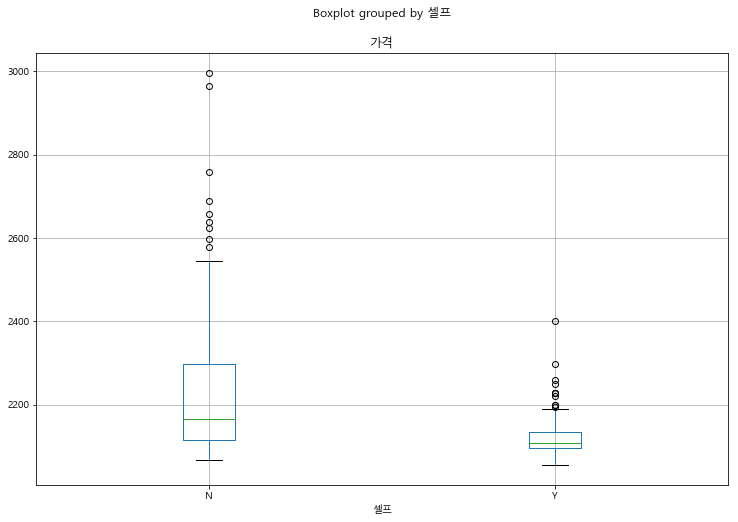

In [20]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8))

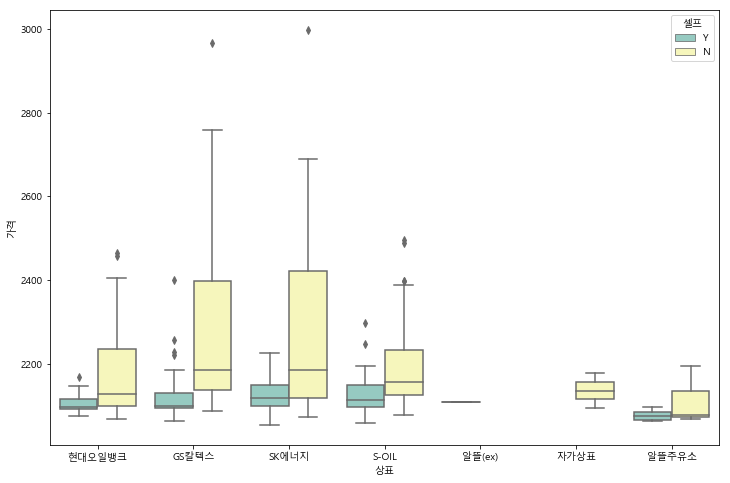

In [21]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=stations, palette="Set3")
plt.show()

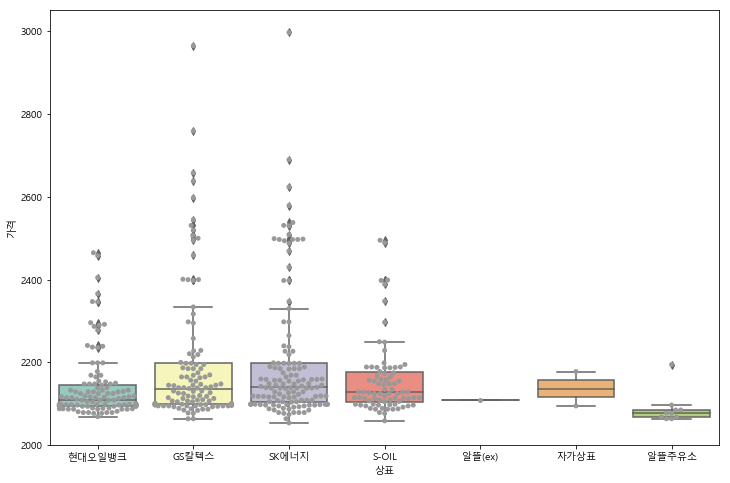

In [22]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", data=stations, palette="Set3")
sns.swarmplot(x="상표", y="가격", data=stations, color=".6")
plt.show()

## 4-5. 서울시 구별 주유 가격 확인하기

In [23]:
import json
import folium
import googlemaps
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [24]:
stations.sort_values(by='가격', ascending=False).head()

,Oil_store,가격,상표,셀프,주소,구
277,서남주유소,2997.0,SK에너지,N,서울 중구 통일로 30,중구
243,서계주유소,2965.0,GS칼텍스,N,서울특별시 용산구 청파로 367 (청파동),용산구
276,필동주유소,2759.0,GS칼텍스,N,서울 중구 퇴계로 196 (필동2가),중구
242,동자동주유소,2690.0,SK에너지,N,서울 용산구 한강대로104길 6 (동자동),용산구
275,약수주유소,2658.0,GS칼텍스,N,서울 중구 다산로 173,중구


In [25]:
stations.sort_values(by='가격', ascending=True).head()

,Oil_store,가격,상표,셀프,주소,구
168,개나리Self주유소,2054.0,SK에너지,Y,서울 양천구 남부순환로 442 (신월동),양천구
169,현대주유소,2059.0,S-OIL,Y,서울 양천구 남부순환로 372 (신월동),양천구
172,지에스칼텍스㈜ 서호주유소,2064.0,GS칼텍스,Y,서울 양천구 남부순환로 317,양천구
171,SK에너지(주) 경인주유소,2064.0,SK에너지,Y,서울 양천구 국회대로 170 (신정동),양천구
170,양천구주유소,2064.0,알뜰주유소,Y,서울 양천구 국회대로 275 (목동),양천구


In [26]:
import numpy as np

gu_data = pd.pivot_table(stations, index=["구"], values=["가격"], 
                         aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,2286.529412
강동구,2192.928571
강북구,2106.363636
강서구,2144.437500
관악구,2145.642857


In [28]:
geo_path = 'data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
              data = gu_data,
              columns=[gu_data.index, '가격'],
              fill_color='PuRd',
              key_on = 'feature.id')

In [30]:
map

## 4-6. 서울시 주유 가격 상하위 10개 주유소 지도에 표기하기

In [32]:
oil_price_top10 = stations.sort_values(by='가격', ascending=False).head(10)
oil_price_top10

,Oil_store,가격,상표,셀프,주소,구
277,서남주유소,2997.0,SK에너지,N,서울 중구 통일로 30,중구
243,서계주유소,2965.0,GS칼텍스,N,서울특별시 용산구 청파로 367 (청파동),용산구
276,필동주유소,2759.0,GS칼텍스,N,서울 중구 퇴계로 196 (필동2가),중구
242,동자동주유소,2690.0,SK에너지,N,서울 용산구 한강대로104길 6 (동자동),용산구
275,약수주유소,2658.0,GS칼텍스,N,서울 중구 다산로 173,중구
446,(주)만정에너지 삼보주유소,2638.0,GS칼텍스,N,서울 강남구 봉은사로 433 (삼성동),강남구
241,한석주유소,2624.0,SK에너지,N,서울 용산구 이촌로 164,용산구
370,구로주유소,2598.0,GS칼텍스,N,서울 구로구 구로동로 137 (구로동),구로구
240,(주)남경주유소,2579.0,SK에너지,N,서울 용산구 녹사평대로11길 24,용산구
445,(주)소모에너지 쎈트럴주유소,2545.0,GS칼텍스,N,서울 강남구 삼성로 335,강남구


In [33]:
oil_price_bottom10 = stations.sort_values(by='가격', ascending=True).head(10)
oil_price_bottom10

,Oil_store,가격,상표,셀프,주소,구
168,개나리Self주유소,2054.0,SK에너지,Y,서울 양천구 남부순환로 442 (신월동),양천구
169,현대주유소,2059.0,S-OIL,Y,서울 양천구 남부순환로 372 (신월동),양천구
172,지에스칼텍스㈜ 서호주유소,2064.0,GS칼텍스,Y,서울 양천구 남부순환로 317,양천구
171,SK에너지(주) 경인주유소,2064.0,SK에너지,Y,서울 양천구 국회대로 170 (신정동),양천구
170,양천구주유소,2064.0,알뜰주유소,Y,서울 양천구 국회대로 275 (목동),양천구
291,지에스칼텍스㈜ 경인고속주유소,2064.0,GS칼텍스,Y,서울 강서구 국회대로 225 (화곡동),강서구
292,목화주유소,2064.0,알뜰주유소,Y,서울 강서구 국회대로 251 (화곡동),강서구
294,뉴신정주유소,2068.0,알뜰주유소,N,서울 강서구 곰달래로 207 (화곡동),강서구
293,화곡역주유소,2068.0,알뜰주유소,Y,서울 강서구 강서로 154 (화곡동),강서구
173,형산석유(주)원주유소,2069.0,현대오일뱅크,N,서울 양천구 남부순환로 408,양천구


In [34]:
gmap_key = "******"
gmaps = googlemaps.Client(key=gmap_key)

In [35]:
from tqdm import tqdm_notebook

In [36]:
lat = []
lng = []

for n in tqdm_notebook(oil_price_top10.index):
    try:
        tmp_add = str((oil_price_top10['주소'][n]).split('(')[0])
        tmp_map = gmaps.geocode(tmp_add)
        
        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print("Here is nan !")
        
oil_price_top10['lat'] = lat
oil_price_top10['lng'] = lng
oil_price_top10
                      

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/10 [00:00<?, ?it/s]

,Oil_store,가격,상표,셀프,주소,구,lat,lng
277,서남주유소,2997.0,SK에너지,N,서울 중구 통일로 30,중구,37.558348,126.972090
243,서계주유소,2965.0,GS칼텍스,N,서울특별시 용산구 청파로 367 (청파동),용산구,37.552290,126.968935
276,필동주유소,2759.0,GS칼텍스,N,서울 중구 퇴계로 196 (필동2가),중구,37.560850,126.993653
242,동자동주유소,2690.0,SK에너지,N,서울 용산구 한강대로104길 6 (동자동),용산구,37.550179,126.972463
275,약수주유소,2658.0,GS칼텍스,N,서울 중구 다산로 173,중구,37.559009,127.012663
446,(주)만정에너지 삼보주유소,2638.0,GS칼텍스,N,서울 강남구 봉은사로 433 (삼성동),강남구,37.511513,127.047093
241,한석주유소,2624.0,SK에너지,N,서울 용산구 이촌로 164,용산구,37.521421,126.965379
370,구로주유소,2598.0,GS칼텍스,N,서울 구로구 구로동로 137 (구로동),구로구,37.490737,126.883519
240,(주)남경주유소,2579.0,SK에너지,N,서울 용산구 녹사평대로11길 24,용산구,37.522207,126.993237
445,(주)소모에너지 쎈트럴주유소,2545.0,GS칼텍스,N,서울 강남구 삼성로 335,강남구,37.501402,127.059066


In [38]:
lat = []
lng = []

for n in tqdm_notebook(oil_price_bottom10.index):
    try:
        tmp_add = oil_price_bottom10['주소'][n].split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)

        tmp_loc = tmp_map[0]['geometry']
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print("Here is nan !")
    
oil_price_bottom10['lat'] = lat
oil_price_bottom10['lng'] = lng
oil_price_bottom10

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/10 [00:00<?, ?it/s]

,Oil_store,가격,상표,셀프,주소,구,lat,lng
168,개나리Self주유소,2054.0,SK에너지,Y,서울 양천구 남부순환로 442 (신월동),양천구,37.528087,126.832981
169,현대주유소,2059.0,S-OIL,Y,서울 양천구 남부순환로 372 (신월동),양천구,37.533811,126.829240
172,지에스칼텍스㈜ 서호주유소,2064.0,GS칼텍스,Y,서울 양천구 남부순환로 317,양천구,37.538552,126.826928
171,SK에너지(주) 경인주유소,2064.0,SK에너지,Y,서울 양천구 국회대로 170 (신정동),양천구,37.528087,126.853820
170,양천구주유소,2064.0,알뜰주유소,Y,서울 양천구 국회대로 275 (목동),양천구,37.530283,126.865529
291,지에스칼텍스㈜ 경인고속주유소,2064.0,GS칼텍스,Y,서울 강서구 국회대로 225 (화곡동),강서구,37.529605,126.859823
292,목화주유소,2064.0,알뜰주유소,Y,서울 강서구 국회대로 251 (화곡동),강서구,37.530006,126.862915
294,뉴신정주유소,2068.0,알뜰주유소,N,서울 강서구 곰달래로 207 (화곡동),강서구,37.531554,126.856024
293,화곡역주유소,2068.0,알뜰주유소,Y,서울 강서구 강서로 154 (화곡동),강서구,37.540657,126.841506
173,형산석유(주)원주유소,2069.0,현대오일뱅크,N,서울 양천구 남부순환로 408,양천구,37.531003,126.831022


In [39]:
map = folium.Map(location=[37.5202, 126.975], zoom_start=10.5)

for n in oil_price_top10.index:
    if pd.notnull(oil_price_top10['lat'][n]):
        folium.CircleMarker([oil_price_top10['lat'][n], oil_price_top10['lng'][n]], 
                            radius=15, color='#CD3181', 
                            fill_color='#CD3181',
                            fill=True).add_to(map)

for n in oil_price_bottom10.index:
    if pd.notnull(oil_price_bottom10['lat'][n]): 
        folium.CircleMarker([oil_price_bottom10['lat'][n], 
                                  oil_price_bottom10['lng'][n]], 
                                  radius=15, color='#3186cc', 
                                  fill_color='#3186cc',
                                  fill=True).add_to(map)

#### bottom이 파란색

In [40]:
map